A regression model going to be fit in this short project based on a data set of a complex cycle power plant (CCPP)

Importing the necessary packeages.

In [5]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Data will be stored in pandas data frame. </br>
Because the data are stored in an excel table lets load the available datas by .read_excel() method.</br>

In [3]:
# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
pd_train = pd.read_excel(r'02_data/Train.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')
print(pd_train.shape)
print(pd_test.shape)

Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
(8568, 5)
(1000, 5)


Lets concentrate on the pd_train data and chek the by neked eye a littel bit. </br>
We can watch the first few lines of data by .head() method.

In [17]:
pd_train.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [18]:
pd_test.head()

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [20]:
pd_train.info()
pd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1000 non-null   float64
 1   V       1000 non-null   float64
 2   AP      1000 non-null   float64
 3   RH      1000 non-null   float64
 4   PE      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


Duplication detection and removal

In [21]:
print('Duplications of TRAIN data set\n')
duplicates_train = pd_train[pd_train.duplicated()]
print('Duplicates: ' + str(duplicates_train.shape))
pd_train_no_duplicates  = pd_train.drop_duplicates()
print('Original Shape of Data: ' + str(pd_train.shape))
print('No Duplicates Data: ' + str(pd_train_no_duplicates.shape))

Duplications of TRAIN data set

Duplicates: (36, 5)
Original Shape of Data: (8568, 5)
No Duplicates Data: (8532, 5)


In [11]:
print('Duplications of TEST data set\n')
duplicates_test = pd_test[pd_test.duplicated()]
print('Duplicates: ' + str(duplicates_test.shape))
pd_test_no_duplicates  = pd_test.drop_duplicates()
print('No Duplicates Data: ' + str(pd_test.shape))
print('Original Shape of Data: ' + str(pd_test_no_duplicates.shape))

Duplications of TEST data set

Duplicates: (0, 5)
No Duplicates Data: (1000, 5)
Original Shape of Data: (1000, 5)


In [12]:
duplicates_test = pd_test[pd_test.duplicated()]
duplicates_test.shape

(0, 5)

Statistical description of data train

In [13]:
pd_train.describe()

,AT,V,AP,RH,PE
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,19.588562,54.243393,1013.276923,73.403318,454.503761
std,7.463503,12.724457,5.939926,14.529301,17.117243
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.447500,41.660000,1009.150000,63.487500,439.867500
50%,20.280000,52.065000,1012.940000,75.010000,451.745000
75%,25.680000,66.510000,1017.290000,84.852500,468.765000
max,37.110000,81.560000,1033.290000,100.160000,495.760000


In [16]:
pd_test_no_duplicates.describe()

,AT,V,AP,RH,PE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.188180,54.840540,1013.106180,72.500670,453.176190
std,7.339061,12.558663,5.929751,15.178236,16.591075
min,3.210000,34.030000,996.350000,26.300000,425.300000
25%,14.147500,42.762500,1008.935000,61.620000,438.835000
50%,21.035000,52.780000,1013.005000,74.395000,450.415000
75%,26.145000,66.560000,1017.042500,84.610000,466.387500
max,35.010000,80.180000,1033.300000,100.140000,494.870000


In [44]:

stats =pd_test.describe()
stats.loc['median'] = pd_test.median().tolist()
stats.loc['skew'] = pd_test.skew().tolist()
stats

,AT,V,AP,RH,PE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.188180,54.840540,1013.106180,72.500670,453.176190
std,7.339061,12.558663,5.929751,15.178236,16.591075
min,3.210000,34.030000,996.350000,26.300000,425.300000
25%,14.147500,42.762500,1008.935000,61.620000,438.835000
50%,21.035000,52.780000,1013.005000,74.395000,450.415000
75%,26.145000,66.560000,1017.042500,84.610000,466.387500
max,35.010000,80.180000,1033.300000,100.140000,494.870000
median,21.035000,52.780000,1013.005000,74.395000,450.415000
skew,-0.162173,0.185184,0.356523,-0.416871,0.351918


Creating histograms (AT,V,AP, RH, PE)

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Szilágyi Gergő\AppData\Local\Temp\ipykernel_24792\3820253857.py:4: SyntaxWarning: invalid escape sequence '\c'
  xlabel='Temperature [$^\circ$C]',


[Text(0.5, 1.0, 'Ambient Temperature'),
 Text(0.5, 0, 'Temperature [$^\\circ$C]'),
 Text(0, 0.5, 'Frequency')]

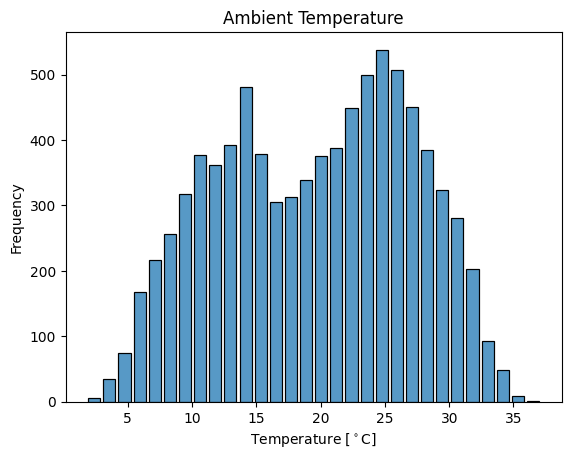

In [14]:
import seaborn as sns
ax = sns.histplot(pd_train['AT'],shrink=.8, )
ax.set(title='Ambient Temperature',
       xlabel='Temperature [$^\circ$C]',
       ylabel='Frequency')


[Text(0.5, 1.0, 'Atmospheric Pressure'),
 Text(0.5, 0, 'Pressure [mbar]'),
 Text(0, 0.5, 'Frequency')]

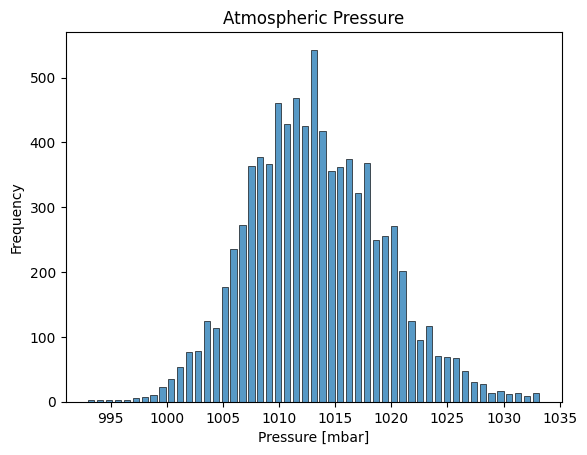

In [11]:
ax_AP = sns.histplot(pd_train['AP'],shrink=.7)
ax_AP.set(title='Atmospheric Pressure',
       xlabel='Pressure [mbar]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Relative Humidity'),
 Text(0.5, 0, ' Humidity [%]'),
 Text(0, 0.5, 'Frequency')]

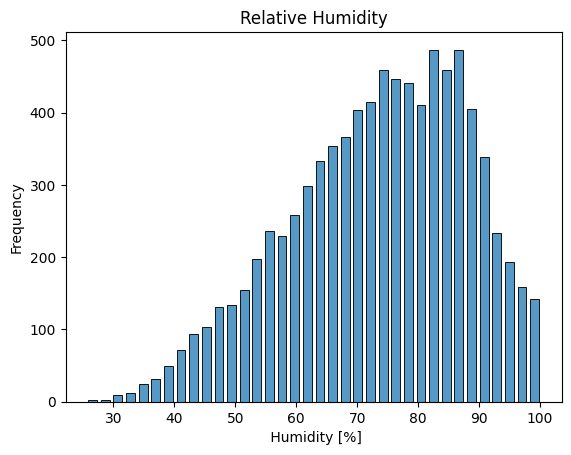

In [12]:
ax_RH = sns.histplot(pd_train['RH'],shrink=.7)
ax_RH.set(title='Relative Humidity',
       xlabel=' Humidity [%]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Exhaust Vacuum'),
 Text(0.5, 0, ' Exhaust Vacuum [cmHG]'),
 Text(0, 0.5, 'Frequency')]

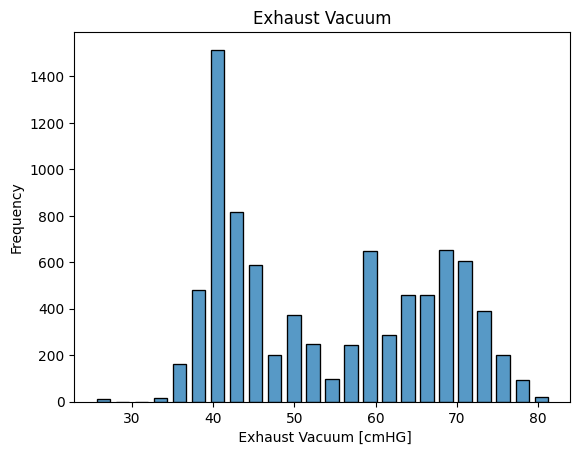

In [14]:
ax_V = sns.histplot(pd_train['V'],shrink=.7)
ax_V.set(title='Exhaust Vacuum',
       xlabel=' Exhaust Vacuum [cmHG]',
       ylabel='Frequency')

[Text(0.5, 1.0, 'Full Load Electrical Power Output'),
 Text(0.5, 0, ' Power Output[MW]'),
 Text(0, 0.5, 'Frequency')]

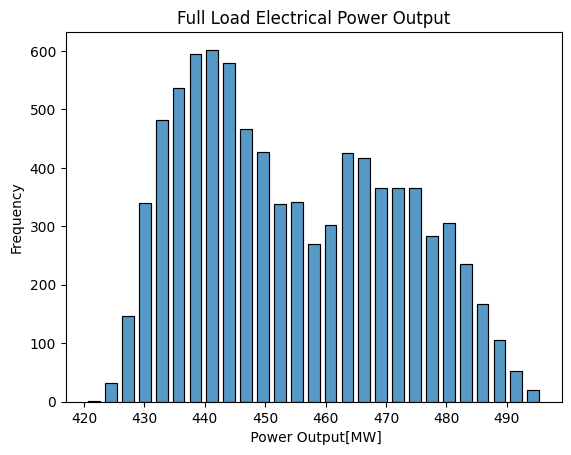

In [15]:
ax_PE = sns.histplot(pd_train['PE'],shrink=.7)
ax_PE.set(title='Full Load Electrical Power Output',
       xlabel=' Power Output[MW]',
       ylabel='Frequency')

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Szilágyi Gergő\AppData\Local\Temp\ipykernel_4376\215456117.py:10: SyntaxWarning: invalid escape sequence '\c'
  xlabel='Temperature [$^\circ$C]',


[Text(0.5, 1.0, 'Exhaust Vacuum'),
 Text(0.5, 0, ' Exhaust Vacuum [cmHG]'),
 Text(0, 0.5, 'Frequency')]

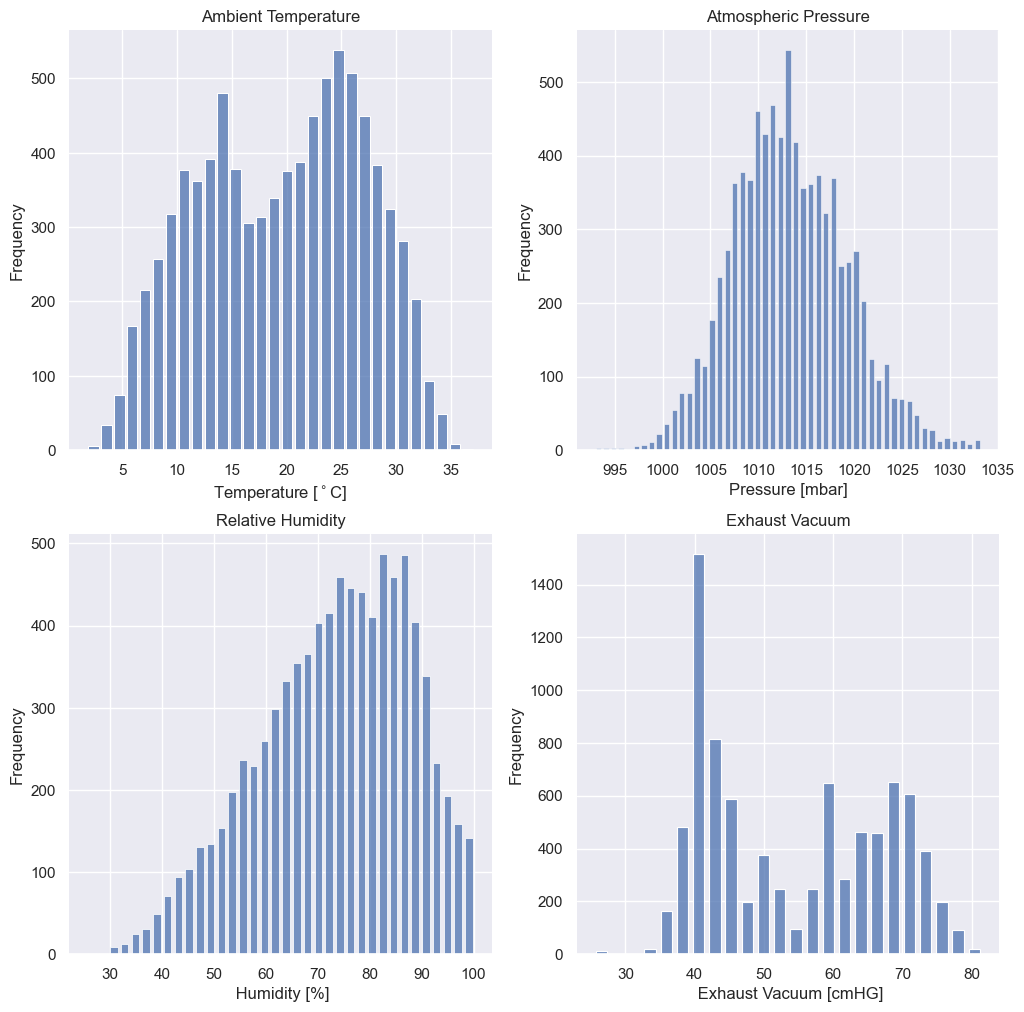

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f, axes = plt.subplots(2, 2, figsize=(12, 12),sharex=False, sharey=False)  
sns.despine(left=True)  

ax = sns.histplot(pd_train['AT'],shrink=.8, ax=axes[0, 0])
ax.set(title='Ambient Temperature',
       xlabel='Temperature [$^\circ$C]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['AP'],shrink=.7, ax=axes[0, 1])
ax.set(title='Atmospheric Pressure',
       xlabel='Pressure [mbar]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['RH'], shrink=.7, ax=axes[1, 0])
ax.set(title='Relative Humidity',
       xlabel=' Humidity [%]',
       ylabel='Frequency')

ax = sns.histplot(pd_train['V'], shrink=.7, ax=axes[1, 1])
ax.set(title='Exhaust Vacuum',
       xlabel=' Exhaust Vacuum [cmHG]',
       ylabel='Frequency')


[Text(0.5, 1.0, 'Full Load Electrical Power Output'),
 Text(0.5, 0, ' Power Output [MW]'),
 Text(0, 0.5, 'Frequency')]

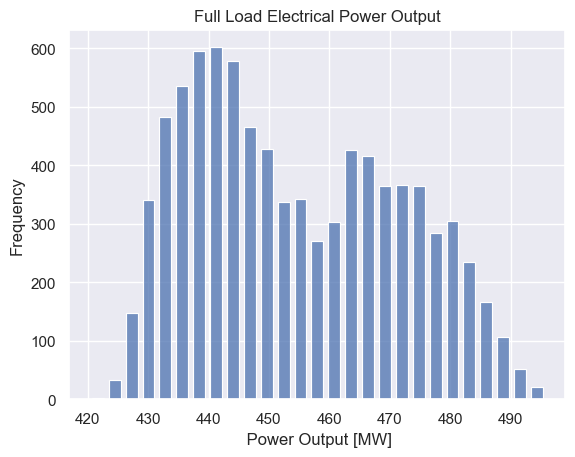

In [17]:
ax = sns.histplot(pd_train['PE'],shrink=.7)
ax.set(title='Full Load Electrical Power Output',
       xlabel=' Power Output [MW]',
       ylabel='Frequency')

In [29]:
print(pd_train['RH'].mode())
print(pd_train['RH'].median())
print(pd_train['RH'].mean())



0    100.09
Name: RH, dtype: float64
75.01
73.40331816059758


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Szilágyi Gergő\AppData\Local\Temp\ipykernel_4376\562291800.py:10: SyntaxWarning: invalid escape sequence '\c'
  xlabel='Temperature [$^\circ$C]')


[Text(0.5, 1.0, 'Exhaust Vacuum'), Text(0.5, 0, ' Exhaust Vacuum [cmHG]')]

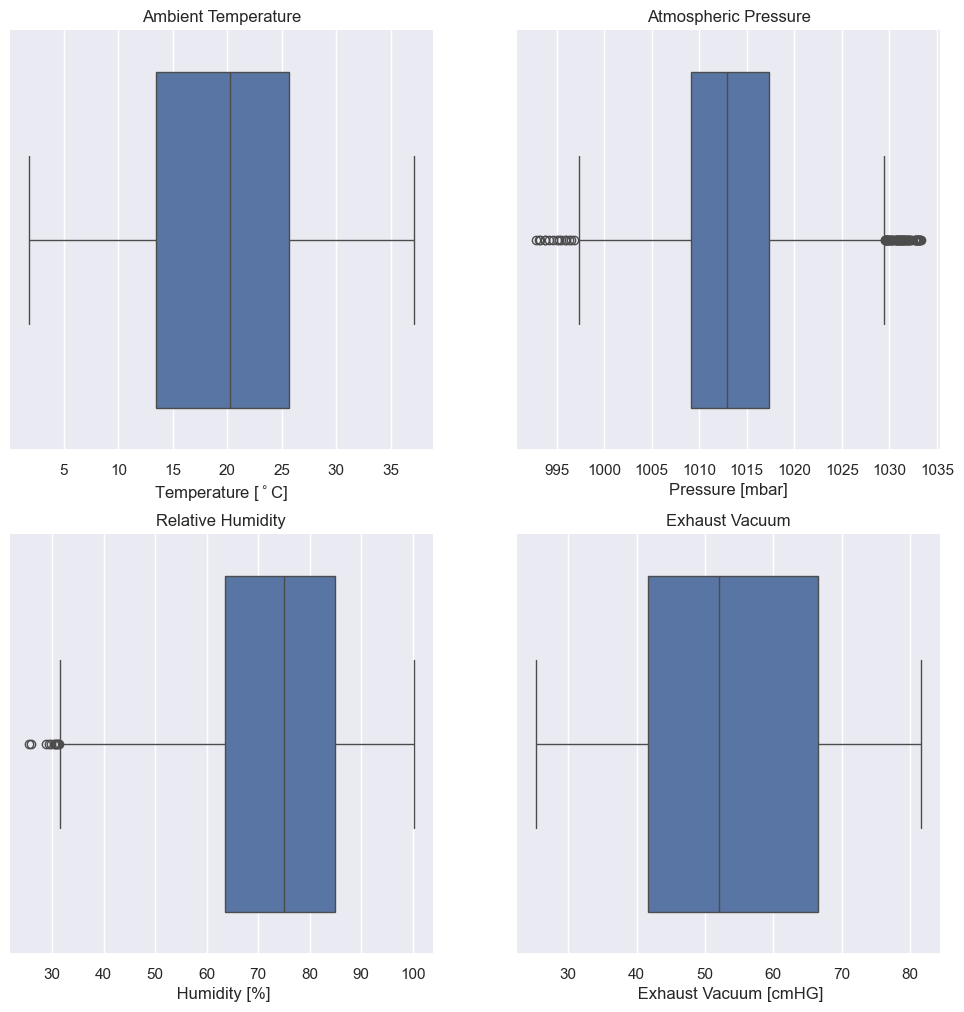

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f, axes = plt.subplots(2, 2, figsize=(12, 12),sharex=False, sharey=False)  
sns.despine(left=True)  

ax = sns.boxplot(x=pd_train['AT'], ax=axes[0, 0])
ax.set(title='Ambient Temperature',
      xlabel='Temperature [$^\circ$C]')

ax = sns.boxplot(x=pd_train['AP'], ax=axes[0, 1])
ax.set(title='Atmospheric Pressure',
       xlabel='Pressure [mbar]')

ax = sns.boxplot(x=pd_train['RH'], ax=axes[1, 0])
ax.set(title='Relative Humidity',
       xlabel=' Humidity [%]')

ax = sns.boxplot(x=pd_train['V'], ax=axes[1, 1])
ax.set(title='Exhaust Vacuum',
       xlabel=' Exhaust Vacuum [cmHG]')

[Text(0.5, 1.0, 'Full Load Electrical Power Output'),
 Text(0.5, 0, ' Power Output [MW]')]

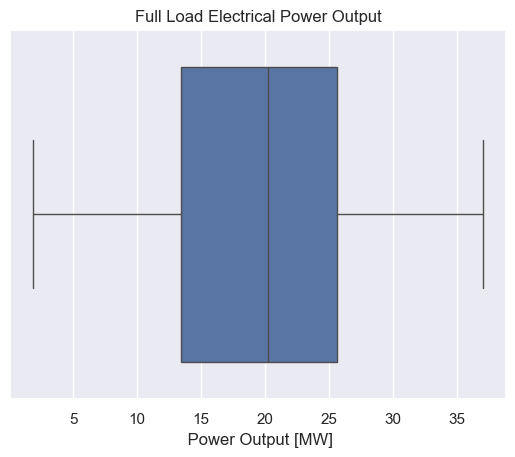

In [40]:
ax = sns.boxplot( x=pd_train['AT'])
ax.set(title='Full Load Electrical Power Output',
       xlabel=' Power Output [MW]')

Outliers cleaning

In [32]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data >= lower_bound) & (data <= upper_bound)].dropna()

filtered_train_data = remove_outliers(pd_train_no_duplicates)
original_train_shape, filtered_train_shape = pd_train_no_duplicates.shape, filtered_train_data.shape

print('shape of original_train_shape (duplications removed): \n' + str(original_train_shape))
print('shape of filtered_train_shape:  \n' + str(filtered_train_shape))

number_of_removed_rows = original_train_shape[0] - filtered_train_shape[0]
print('Number of rows has ben removed: ' + str(number_of_removed_rows))

filtered_train_data.to_excel('02_data/filtered_train.xlsx')
print('Filtered data has been saved: \n 02_data/filtered_train.xlsx')

pd_train = filtered_train_data

shape of original_train_shape (duplications removed): 
(8532, 5)
shape of filtered_train_shape:  
(8440, 5)
Number of rows has ben removed: 92
Filtered data has been saved: 
 02_data/filtered_train.xlsx


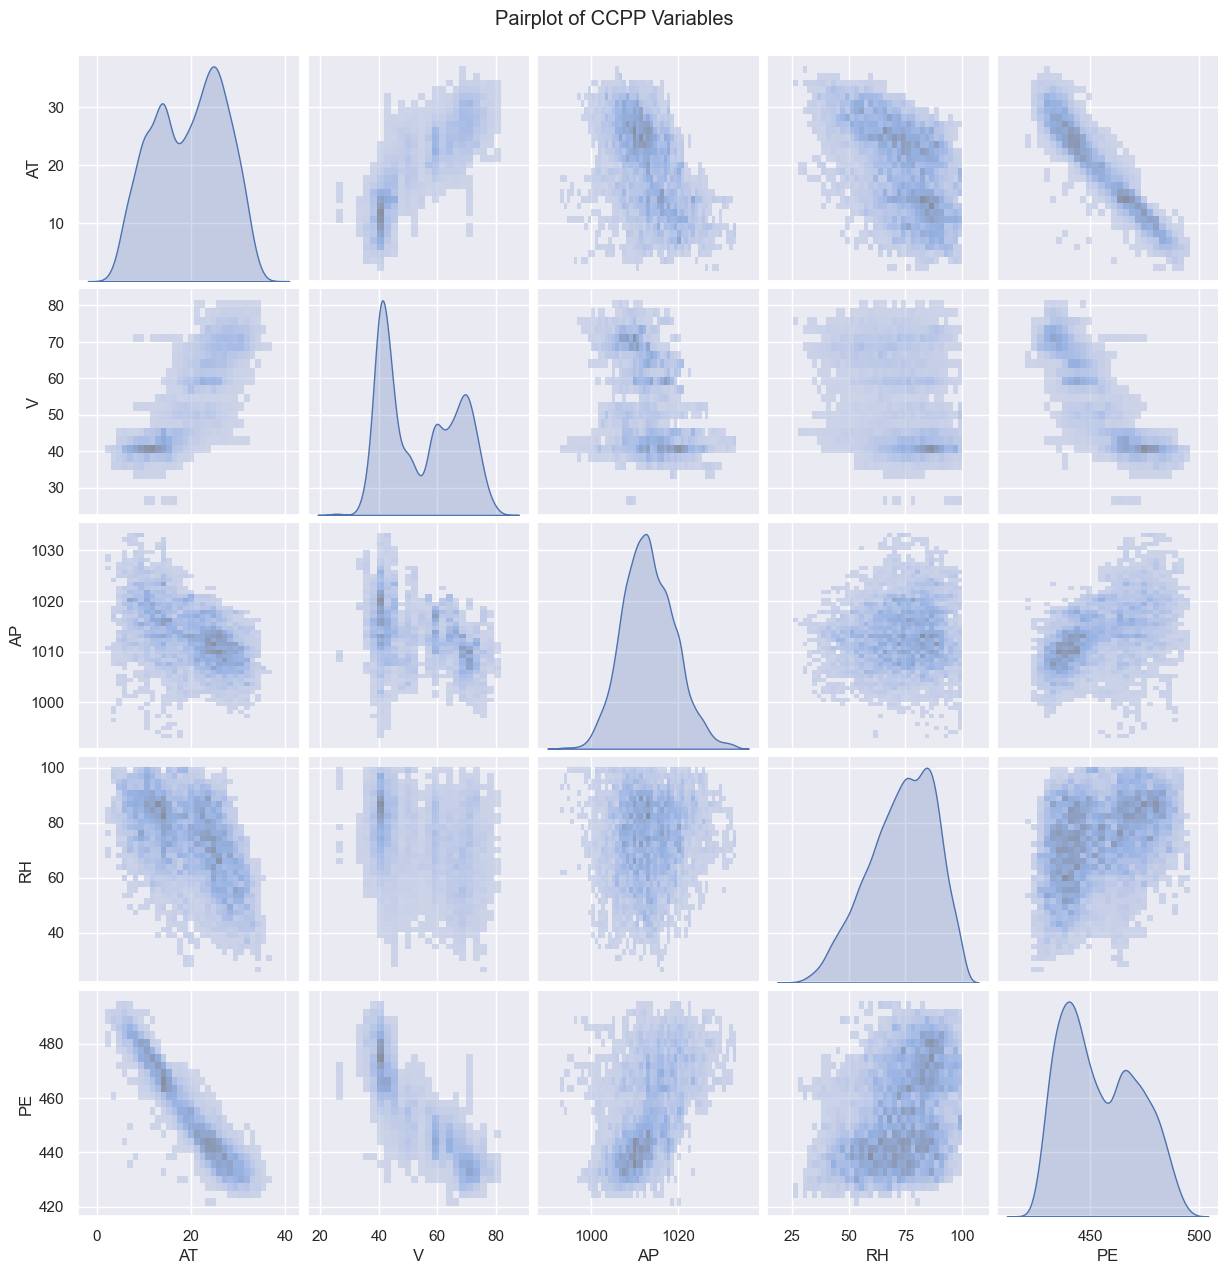

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
pairplot = sns.pairplot(pd_train, kind="hist", diag_kind="kde", plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot of CCPP Variables', y=1.02)  # Adjust y to make space for title

# Display the plot
plt.show()


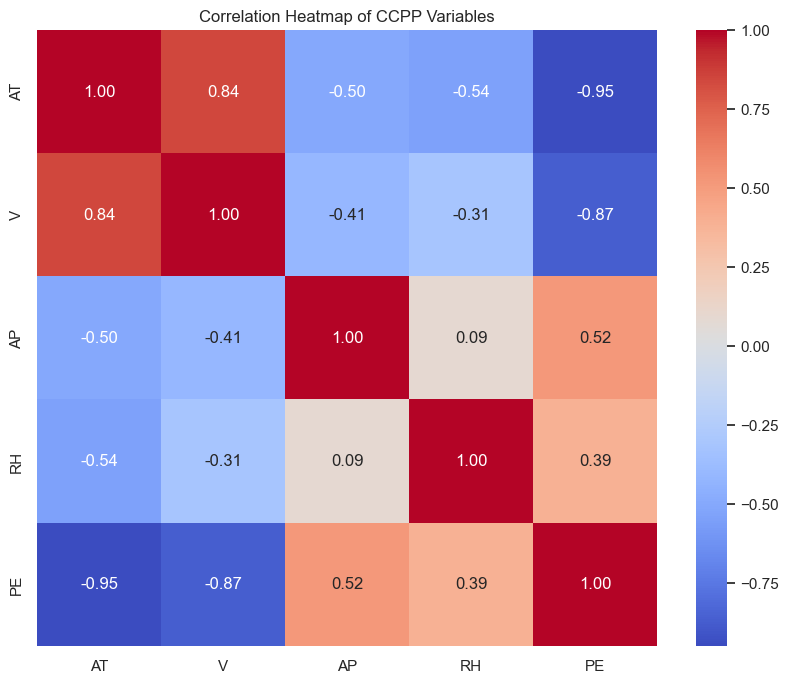

In [39]:

# Compute the correlation matrix for the training data
correlation_matrix = pd_train.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of CCPP Variables')
plt.show()
